# Домашнее задание «Функции потерь и оптимизация» обновленное

### **Задание**

#### **Цель:** изучить применение методов оптимизации для решения задачи классификации

### **Описание задания:**
В домашнем задании необходимо применить полученные знания в теории оптимизации и машинном обучении для реализации логистической регрессии.

**Этапы работы:**
1. Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.
2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.
3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.
4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).
5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).
6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

In [1]:
import numpy as np
import pandas as pd
#import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style(style = 'dark')
sns.set(font_scale=0.5)
sns.set(rc={'figure.figsize':(16,6)})

In [3]:
from sklearn import datasets

In [4]:
data = datasets.load_iris()

In [5]:
iris = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [6]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
iris = iris.query('target in (1.0,2.0)')

In [8]:
iris.rename(columns={'sepal length (cm)':'sepal_lg', 'sepal width (cm)':'sepal_wd', \
                      'petal length (cm)':'petal_lg', 'petal width (cm)':'petal_wd'}, inplace=True)

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


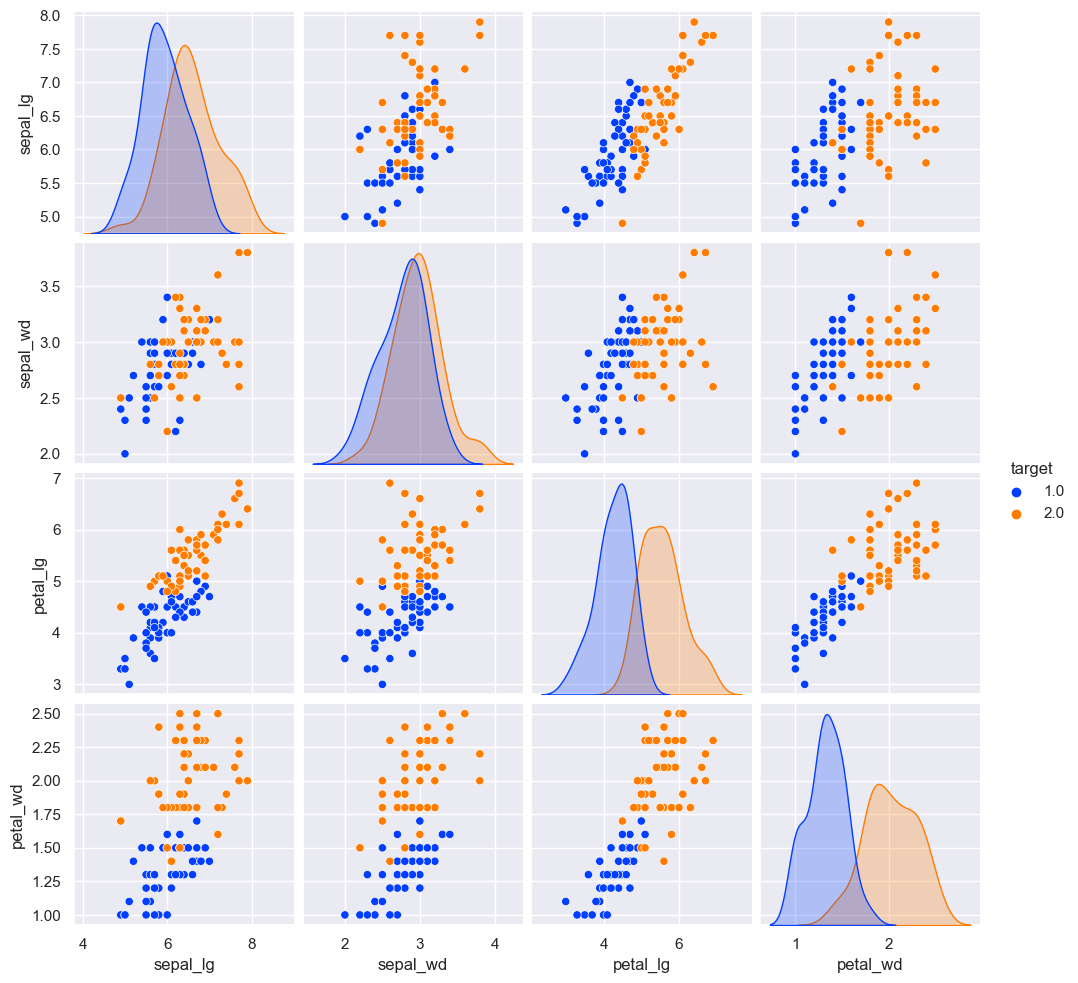

In [9]:
# Just to see the potenial for logistic regression behind the data 
sns.pairplot(iris, hue = 'target', palette = 'bright')
plt.show()

In [10]:
X = iris[['sepal_lg', 'sepal_wd', 'petal_lg', 'petal_wd']].values

In [11]:
y = iris['target'].values

In [12]:
X = np.c_[np.ones(len(X)), X]

In [13]:
X

array([[1. , 7. , 3.2, 4.7, 1.4],
       [1. , 6.4, 3.2, 4.5, 1.5],
       [1. , 6.9, 3.1, 4.9, 1.5],
       [1. , 5.5, 2.3, 4. , 1.3],
       [1. , 6.5, 2.8, 4.6, 1.5],
       [1. , 5.7, 2.8, 4.5, 1.3],
       [1. , 6.3, 3.3, 4.7, 1.6],
       [1. , 4.9, 2.4, 3.3, 1. ],
       [1. , 6.6, 2.9, 4.6, 1.3],
       [1. , 5.2, 2.7, 3.9, 1.4],
       [1. , 5. , 2. , 3.5, 1. ],
       [1. , 5.9, 3. , 4.2, 1.5],
       [1. , 6. , 2.2, 4. , 1. ],
       [1. , 6.1, 2.9, 4.7, 1.4],
       [1. , 5.6, 2.9, 3.6, 1.3],
       [1. , 6.7, 3.1, 4.4, 1.4],
       [1. , 5.6, 3. , 4.5, 1.5],
       [1. , 5.8, 2.7, 4.1, 1. ],
       [1. , 6.2, 2.2, 4.5, 1.5],
       [1. , 5.6, 2.5, 3.9, 1.1],
       [1. , 5.9, 3.2, 4.8, 1.8],
       [1. , 6.1, 2.8, 4. , 1.3],
       [1. , 6.3, 2.5, 4.9, 1.5],
       [1. , 6.1, 2.8, 4.7, 1.2],
       [1. , 6.4, 2.9, 4.3, 1.3],
       [1. , 6.6, 3. , 4.4, 1.4],
       [1. , 6.8, 2.8, 4.8, 1.4],
       [1. , 6.7, 3. , 5. , 1.7],
       [1. , 6. , 2.9, 4.5, 1.5],
       [1. , 5

In [14]:
# приведение цели к стандартным значениям 0 и 1
y -= 1

In [15]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

1. logloss - функция логистической функции потерь (cross entropy) $logloss = - \frac{1}{n}\sum (y_i \cdot log(p_i) + (1-y_i) \cdot log(1 - p_i))$


2. gr_logloss - градиент функции logloss записанные в матричном виде. $X^{T}(\sigma(XW)-Y)$

## Решение через функцию

In [16]:
def my_logistic_regression_gd(X,y,eps,step, n_iterations, interval):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))


    def logloss(y, y_proba):
        logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
        logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
        logloss_total = -(logloss_0 + logloss_1) / len(y)
        return logloss_total


    def gr_logloss(x, w, y):
        y_proba = sigmoid(x @ w)
        grad = x.T @ (y_proba - y)
        return grad


    # выбор начальной точки
    np.random.seed(11)
    W = np.random.randn(X.shape[1])

    next_W = W

    for i in range(n_iterations):
        cur_W = next_W

        next_W = cur_W - step * gr_logloss(X, cur_W, y)
        # остановка когда достигнута необходимая степень точности выбранной метрики
        if np.linalg.norm(cur_W - next_W) <= eps:
            print(f"Итерация: {i}")
            print(f"Error: {np.linalg.norm(cur_W - next_W)}")
            y_proba = sigmoid(X @ next_W)
            y_class = np.where(y_proba >= 0.5, 1, 0)
            accuracy = (y_class == y).sum() / len(y)
            print(f"Logloss {logloss(y, y_proba)}")
            print(f"Accuracy {accuracy}")
            break
            
        if i % interval == 0:
            print(f"Итерация: {i}")
            print(f"Error: {np.linalg.norm(cur_W - next_W)}")
            y_proba = sigmoid(X @ next_W)
            y_class = np.where(y_proba >= 0.5, 1, 0)
            accuracy = (y_class == y).sum() / len(y)
            print(f"Logloss {logloss(y, y_proba)}")
            print(f"Accuracy {accuracy}")
            print("--------------------------------------------------------")
    #return
    

In [17]:
my_logistic_regression_gd(X,y,0.001,0.005, 10000, 1000)

Итерация: 0
Error: 2.3475296928197547
Logloss 3.0358452939178484
Accuracy 0.5
--------------------------------------------------------
Итерация: 1000
Error: 0.00205346360229172
Logloss 0.09951086954008093
Accuracy 0.97
--------------------------------------------------------
Итерация: 2000
Error: 0.0016527842847610273
Logloss 0.09276543298587583
Accuracy 0.96
--------------------------------------------------------
Итерация: 3000
Error: 0.0014069100404463315
Logloss 0.0881249430533394
Accuracy 0.97
--------------------------------------------------------
Итерация: 4000
Error: 0.0012332898162599523
Logloss 0.08465854299003964
Accuracy 0.97
--------------------------------------------------------
Итерация: 5000
Error: 0.0011017944470724866
Logloss 0.08194269493045894
Accuracy 0.97
--------------------------------------------------------
Итерация: 5976
Error: 0.0009999557062727704
Logloss 0.07979300711415839
Accuracy 0.97


## Решение через класс

In [18]:
class logistic_regression:
    def my_logistic_regression_gd(self,X,y,eps,step, n_iterations, interval):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))


        def logloss(y, y_proba):
            logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
            logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
            logloss_total = -(logloss_0 + logloss_1) / len(y)
            return logloss_total


        def gr_logloss(x, w, y):
            y_proba = sigmoid(x @ w)
            grad = x.T @ (y_proba - y)
            return grad


        # выбор начальной точки
        np.random.seed(11)
        W = np.random.randn(X.shape[1])

        next_W = W

        for i in range(n_iterations):
            cur_W = next_W

            next_W = cur_W - step * gr_logloss(X, cur_W, y)
            # остановка когда достигнута необходимая степень точности выбранной метрики
            if np.linalg.norm(cur_W - next_W) <= eps:
                print(f"Итерация: {i}")
                print(f"Error: {np.linalg.norm(cur_W - next_W)}")
                y_proba = sigmoid(X @ next_W)
                y_class = np.where(y_proba >= 0.5, 1, 0)
                accuracy = (y_class == y).sum() / len(y)
                print(f"Logloss {logloss(y, y_proba)}")
                print(f"Accuracy {accuracy}")
                break

            if i % interval == 0:
                print(f"Итерация: {i}")
                print(f"Error: {np.linalg.norm(cur_W - next_W)}")
                y_proba = sigmoid(X @ next_W)
                y_class = np.where(y_proba >= 0.5, 1, 0)
                accuracy = (y_class == y).sum() / len(y)
                print(f"Logloss {logloss(y, y_proba)}")
                print(f"Accuracy {accuracy}")
                print("--------------------------------------------------------")

In [19]:
lr=logistic_regression()

In [20]:
lr.my_logistic_regression_gd(X,y,0.001,0.005, 10000, 1000)

Итерация: 0
Error: 2.3475296928197547
Logloss 3.0358452939178484
Accuracy 0.5
--------------------------------------------------------
Итерация: 1000
Error: 0.00205346360229172
Logloss 0.09951086954008093
Accuracy 0.97
--------------------------------------------------------
Итерация: 2000
Error: 0.0016527842847610273
Logloss 0.09276543298587583
Accuracy 0.96
--------------------------------------------------------
Итерация: 3000
Error: 0.0014069100404463315
Logloss 0.0881249430533394
Accuracy 0.97
--------------------------------------------------------
Итерация: 4000
Error: 0.0012332898162599523
Logloss 0.08465854299003964
Accuracy 0.97
--------------------------------------------------------
Итерация: 5000
Error: 0.0011017944470724866
Logloss 0.08194269493045894
Accuracy 0.97
--------------------------------------------------------
Итерация: 5976
Error: 0.0009999557062727704
Logloss 0.07979300711415839
Accuracy 0.97
